In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('./data/customer_payment_data.csv' ,encoding='cp949')

In [4]:
df.head()

,날짜,전국_합계,전국_종합소매,전국_백화점,전국_대형마트/유통전문점,전국_슈퍼마켓,전국_편의점,전국_면세점,전국_전자상거래/통신판매,전국_식료품,...,기타_오락/문화,기타_스포츠/오락/여가,기타_서적/문구,기타_교육,기타_숙박/음식,기타_숙박,기타_음식점,기타_공과금/개인및전문서비스,기타_금융/보험,기타_기타
0,2010/01,21112945,3896648,1046319,1970279,666373,70993,142685,1898278,395329,...,27837,21243,6594,13302,69028,6632,62397,20377,18873,39680
1,2010/02,20392319,3894444,910952,2098611,677879,80519,126482,1767115,482663,...,19883,14896,4987,10585,50427,4577,45850,16992,15326,29696
2,2010/03,23524772,4263787,1114037,2205886,707834,79535,156494,2044895,413017,...,22555,16596,5959,9283,49034,4180,44854,14920,14943,27852
3,2010/04,22218264,3957763,1045405,1984126,701029,77647,149556,1870235,410024,...,20910,16962,3948,6478,44476,4163,40313,13653,13627,50027
4,2010/05,23036621,4348950,1140185,2209669,753995,84775,160326,1907634,449972,...,21654,18185,3469,6945,45323,4022,41301,13291,12978,27804


In [13]:
# 지역 리스트
region_list = []
for c in df.columns[1:]:
    reg = c[:2]
    if reg not in region_list:
        region_list.append(reg)

In [14]:
region_list

['전국',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주',
 '기타']

In [4]:
def region_extract(df, region:str):
    date = df['날짜']
    col = df.columns
    
    region_col = [c for c in col if c[:2] == region]
#     print(region_col)
    region_df = df[region_col]
    region_df.insert(0, '날짜', date)
#     print(region_df.head())
    return region_df

In [5]:
r_df = region_extract(df, '전국')
r_df.head()

,날짜,전국_합계,전국_종합소매,전국_백화점,전국_대형마트/유통전문점,전국_슈퍼마켓,전국_편의점,전국_면세점,전국_전자상거래/통신판매,전국_식료품,...,전국_오락/문화,전국_스포츠/오락/여가,전국_서적/문구,전국_교육,전국_숙박/음식,전국_숙박,전국_음식점,전국_공과금/개인및전문서비스,전국_금융/보험,전국_기타
0,2010/01,21112945,3896648,1046319,1970279,666373,70993,142685,1898278,395329,...,931703,681654,250049,773783,2523163,204685,2318478,1272172,775214,1422975
1,2010/02,20392319,3894444,910952,2098611,677879,80519,126482,1767115,482663,...,854670,620232,234438,782854,2258609,165533,2093076,1172247,742836,1414682
2,2010/03,23524772,4263787,1114037,2205886,707834,79535,156494,2044895,413017,...,1181319,819449,361870,911390,2759929,184830,2575099,1209601,922914,1598574
3,2010/04,22218264,3957763,1045405,1984126,701029,77647,149556,1870235,410024,...,1071482,821502,249980,767278,2722885,223252,2499633,1250836,791823,1559754
4,2010/05,23036621,4348950,1140185,2209669,753995,84775,160326,1907634,449972,...,1159038,923657,235381,843435,2962964,238273,2724691,1202310,760871,1580820


In [6]:
def month_sum_calculator(df, month_list:list):
    # return 으로 쓰일 빈 데이터 프레임 생성.
    month_sum_df = pd.DataFrame()

    # 분석에 쓰일 년도 리스트를 받아서 해당 년도 반복문 수행.
    for m in month_list:
        # 2022년의 경우 1월 부터 5월까지만 있고 나머지 연도의 경우 12월까지 있으므로 조건문을 통한 별도 수행.
        if m != 2022:
            month_df = df[df['날짜'].between(f'{m}/01', f'{m}/12')]
        else:
            month_df = df[df['날짜'].between(f'{m}/01', f'{m}/05')]
        # 각 변수별 연도 sum데이터 생성 -> 최종 결과 데이터 프레임에 쌓아줌으로써 각 변수별 년도 Sum데이터의 데이터프레임 생성.
        col_sum = pd.DataFrame()
        # column의 0번 컬럼은 날짜이므로 제외하여 수행 [1:]
        for col in month_df.columns[1:]:
            # f-string을 활용하여 각 컬럼이름_총합 이라는 변수명을 가진 변수에 sum을 통해 산출된 데이터 삽입.
            col_sum[f'{col}_총합'] = [month_df[col].sum()]
        # 함수 시작 부분에 선언된 빈 데이터 프레임인 month_sum_df에 col_sum의 컬럼별 sum 데이터를 년도순 (2017 ~ 2022)로 병합. 
        month_sum_df = pd.concat([month_sum_df, col_sum], axis=0)
    # index는 month_list로 설정 = 년도로 설정.
    month_sum_df.index = month_list
    return month_sum_df

In [7]:
year_list = [2016,2017, 2018, 2019, 2020, 2021, 2022]

In [8]:
year_total_sum = month_sum_calculator(r_df, year_list)

In [9]:
year_total_sum

,전국_합계_총합,전국_종합소매_총합,전국_백화점_총합,전국_대형마트/유통전문점_총합,전국_슈퍼마켓_총합,전국_편의점_총합,전국_면세점_총합,전국_전자상거래/통신판매_총합,전국_식료품_총합,전국_일반식료품_총합,...,전국_오락/문화_총합,전국_스포츠/오락/여가_총합,전국_서적/문구_총합,전국_교육_총합,전국_숙박/음식_총합,전국_숙박_총합,전국_음식점_총합,전국_공과금/개인및전문서비스_총합,전국_금융/보험_총합,전국_기타_총합
2016,418269660,71382694,14502879,31085254,18636549,5434935,1723077,51670046,7580886,6754435,...,14616843,11308874,3307968,11257309,50759582,2744232,48015350,38994711,15754544,30989320
2017,463263446,76168654,15094562,31719720,20675618,6734386,1944370,64595909,8260024,7422566,...,15234208,11925877,3308331,11853887,55174380,2911441,52262940,45370630,17392253,34089067
2018,503257808,80646918,15590341,32364157,22680455,8048779,1963187,76470456,8803593,7971022,...,15540943,12189502,3351441,12537516,59776469,3025674,56750796,49955758,19125336,37413216
2019,538807655,81715140,15874290,33366586,21352913,8926678,2194668,93396977,9245565,8393704,...,16295958,12830907,3465049,13410642,62880860,3152822,59728038,55925167,21882509,39973526
2020,550072383,79868221,14187834,34450924,21209923,9464188,555350,116325130,10266212,9454477,...,14126877,11051423,3075456,11152757,53714613,2363506,51351109,61063653,24989934,40980318
2021,605221466,85135882,17180576,35365355,21489167,10509690,591096,140920641,11354587,10557861,...,15711387,12515928,3195458,12573137,52893613,2788617,50104995,69038945,26883473,44705404
2022,269094122,36472998,7883268,14718991,8999376,4592653,278711,65027834,4961509,4648149,...,6995329,5601489,1393838,5427671,24117193,1294445,22822749,30577136,11579315,20095866


In [10]:
new_col = []
for i in year_total_sum.index[:-1]:
    n = (year_total_sum['전국_합계_총합'][i+1] - year_total_sum['전국_합계_총합'][i])/year_total_sum['전국_합계_총합'][i] *100
    n = round(n, 2)
    new_col.append(n)

In [11]:
new_col

[10.76, 8.63, 7.06, 2.09, 10.03, -55.54]

In [12]:
analy_tgt = []
for a in year_total_sum['전국_합계_총합'].tolist()[1:]:
    a = round(a/10000000, 2)
    analy_tgt.append(a)
analy_tgt

[46.33, 50.33, 53.88, 55.01, 60.52, 26.91]

In [16]:
s= year_total_sum['전국_합계_총합'].tolist()

In [43]:
t = year_total_sum.columns

In [45]:
t2 = [c.replace('/', '_') for c in t]
t2

['전국_합계_총합',
 '전국_종합소매_총합',
 '전국_백화점_총합',
 '전국_대형마트_유통전문점_총합',
 '전국_슈퍼마켓_총합',
 '전국_편의점_총합',
 '전국_면세점_총합',
 '전국_전자상거래_통신판매_총합',
 '전국_식료품_총합',
 '전국_일반식료품_총합',
 '전국_건강보조식품_총합',
 '전국_의류_잡화_총합',
 '전국_의복_직물_총합',
 '전국_복식잡화_총합',
 '전국_시계_귀금속_안경_총합',
 '전국_화장품_총합',
 '전국_연료_총합',
 '전국_가구_가전_총합',
 '전국_가구_총합',
 '전국_가전제품_정보통신기기_총합',
 '전국_의료_보건_총합',
 '전국_종합병원_총합',
 '전국_일반병의원_기타의료기관_총합',
 '전국_자동차_총합',
 '전국_국산자동차신품_총합',
 '전국_기타운송수단_총합',
 '전국_자동차부품및정비_총합',
 '전국_여행_교통_총합',
 '전국_여행사_자동차임대_총합',
 '전국_항공사_총합',
 '전국_대중교통_총합',
 '전국_오락_문화_총합',
 '전국_스포츠_오락_여가_총합',
 '전국_서적_문구_총합',
 '전국_교육_총합',
 '전국_숙박_음식_총합',
 '전국_숙박_총합',
 '전국_음식점_총합',
 '전국_공과금_개인및전문서비스_총합',
 '전국_금융_보험_총합',
 '전국_기타_총합']

In [46]:
t

Index(['전국_합계_총합', '전국_종합소매_총합', '전국_백화점_총합', '전국_대형마트/유통전문점_총합', '전국_슈퍼마켓_총합',
       '전국_편의점_총합', '전국_면세점_총합', '전국_전자상거래/통신판매_총합', '전국_식료품_총합',
       '전국_일반식료품_총합', '전국_건강보조식품_총합', '전국_의류/잡화_총합', '전국_의복/직물_총합',
       '전국_복식잡화_총합', '전국_시계/귀금속/안경_총합', '전국_화장품_총합', '전국_연료_총합', '전국_가구/가전_총합',
       '전국_가구_총합', '전국_가전제품/정보통신기기_총합', '전국_의료/보건_총합', '전국_종합병원_총합',
       '전국_일반병의원/기타의료기관_총합', '전국_자동차_총합', '전국_국산자동차신품_총합', '전국_기타운송수단_총합',
       '전국_자동차부품및정비_총합', '전국_여행/교통_총합', '전국_여행사/자동차임대_총합', '전국_항공사_총합',
       '전국_대중교통_총합', '전국_오락/문화_총합', '전국_스포츠/오락/여가_총합', '전국_서적/문구_총합',
       '전국_교육_총합', '전국_숙박/음식_총합', '전국_숙박_총합', '전국_음식점_총합',
       '전국_공과금/개인및전문서비스_총합', '전국_금융/보험_총합', '전국_기타_총합'],
      dtype='object')

In [54]:
def create_plot(df):
    col_names = df.columns
    col_names = [c.replace('/', '-') for c in col_names]
    
    df.columns = col_names

    for col in col_names:
        new_col = []
        analy_tgt = []
        
        for i in df.index[:-1]:
            n = (df[col][i+1] - df[col][i])/df[col][i] *100
            n = round(n, 2)
            new_col.append(n)
        
        for a in df[col].tolist()[1:]:
            
            a_leng = len(str(a)) - 1
            a_leng *= '0'
            a_leng = int('1' + a_leng)
            
            a = round(a/a_leng, 2)
            analy_tgt.append(a)
        
        x = df.index[1:]
        y1 = analy_tgt
        y2 = new_col
        fig, ax1 = plt.subplots()
        ax1.set_facecolor('white')

        ax1.bar(x, y1,  color='red', alpha=0.7, width=0.7)
        ax1.set_xlabel('Year')
        ax1.set_ylabel(f'{col}')
        ax1.set_ylim(ymin=int(min(y1))-1, ymax=int(max(y1)) + 1)
        ax1.tick_params(axis = 'both', direction ='in')


        ax2 = ax1.twinx()
        ax2.plot(x, y2, '-*', color='blue', markersize = 8, linewidth=2, alpha=0.7)
        ax2.set_ylabel('증감율')
        ax2.tick_params(axis ='y', direction='in')
        
        plt.savefig(f'./img/{col}_plot.png')
    return None

[10.76, 8.63, 7.06, 2.09, 10.03, -55.54]
[4.63, 5.03, 5.39, 5.5, 6.05, 2.69]
[6.7, 5.88, 1.32, -2.26, 6.6, -57.16]
[7.62, 8.06, 8.17, 7.99, 8.51, 3.65]
[4.08, 3.28, 1.82, -10.62, 21.09, -54.12]
[1.51, 1.56, 1.59, 1.42, 1.72, 7.88]
[2.04, 2.03, 3.1, 3.25, 2.65, -58.38]
[3.17, 3.24, 3.34, 3.45, 3.54, 1.47]
[10.94, 9.7, -5.85, -0.67, 1.32, -58.12]
[2.07, 2.27, 2.14, 2.12, 2.15, 9.0]
[23.91, 19.52, 10.91, 6.02, 11.05, -56.3]
[6.73, 8.05, 8.93, 9.46, 1.05, 4.59]
[12.84, 0.97, 11.79, -74.7, 6.44, -52.85]
[1.94, 1.96, 2.19, 5.55, 5.91, 2.79]
[25.02, 18.38, 22.13, 24.55, 21.14, -53.85]
[6.46, 7.65, 9.34, 1.16, 1.41, 6.5]
[8.96, 6.58, 5.02, 11.04, 10.6, -56.3]
[8.26, 8.8, 9.25, 1.03, 1.14, 4.96]
[9.89, 7.39, 5.3, 12.64, 11.67, -55.97]
[7.42, 7.97, 8.39, 9.45, 1.06, 4.65]
[1.33, -0.58, 2.32, -4.71, -1.85, -60.67]
[8.37, 8.33, 8.52, 8.12, 7.97, 3.13]
[0.02, -2.39, -5.07, -17.3, 3.64, -57.54]
[1.51, 1.48, 1.4, 1.16, 1.2, 5.1]
[-0.59, -2.34, -7.87, -18.32, 4.14, -56.82]
[8.37, 8.17, 7.53, 6.15, 6.4

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


[2.51, 0.78, 5.96, -4.98, 12.1, -58.75]
[8.05, 8.11, 8.59, 8.16, 9.15, 3.78]
[12.01, 8.57, 9.65, 2.0, 7.34, -54.49]
[2.77, 3.01, 3.3, 3.36, 3.61, 1.64]
[6.5, 2.78, -0.71, 20.96, -2.16, -61.67]
[2.79, 2.87, 2.85, 3.45, 3.37, 1.29]
[6.9, 1.78, -1.8, 31.08, -6.52, -62.58]
[1.87, 1.9, 1.87, 2.45, 2.29, 8.57]
[10.71, 5.07, 0.08, 10.73, 17.02, -58.34]
[1.52, 1.59, 1.59, 1.76, 2.07, 8.6]
[4.77, 4.76, 1.68, -0.03, 6.71, -60.06]
[7.72, 8.09, 8.23, 8.22, 8.77, 3.5]
[13.91, 5.43, 2.29, -52.24, 8.65, -47.86]
[1.28, 1.35, 1.38, 6.61, 7.18, 3.74]
[11.04, 2.4, -8.27, -68.74, -2.53, -50.29]
[1.63, 1.67, 1.53, 4.79, 4.67, 2.32]
[19.35, 9.26, -0.01, -86.52, 54.54, -9.47]
[4.67, 5.1, 5.1, 6.87, 1.06, 9.62]
[11.01, 3.45, 6.64, -24.44, 3.83, -54.88]
[6.53, 6.75, 7.2, 5.44, 5.65, 2.55]
[4.22, 2.01, 4.86, -13.31, 11.22, -55.48]
[1.52, 1.55, 1.63, 1.41, 1.57, 7.0]
[5.46, 2.21, 5.26, -13.87, 13.25, -55.25]
[1.19, 1.22, 1.28, 1.11, 1.25, 5.6]
[0.01, 1.3, 3.39, -11.24, 3.9, -56.38]
[3.31, 3.35, 3.47, 3.08, 3.2, 

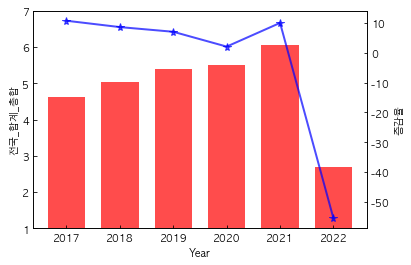

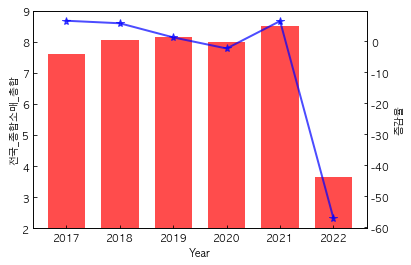

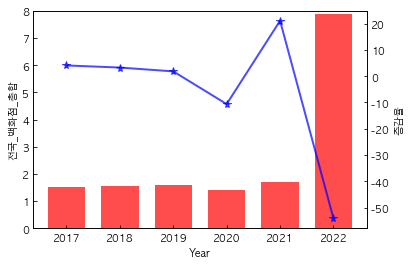

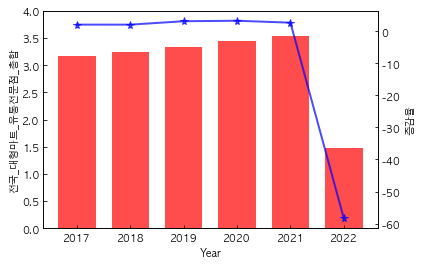

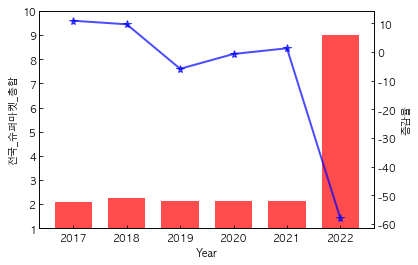

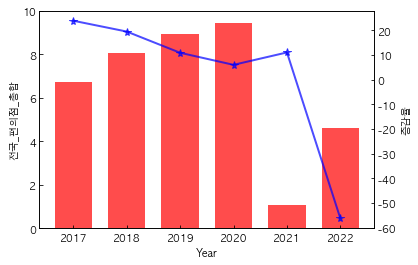

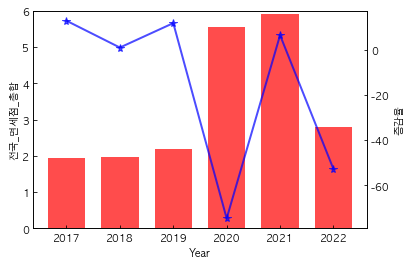

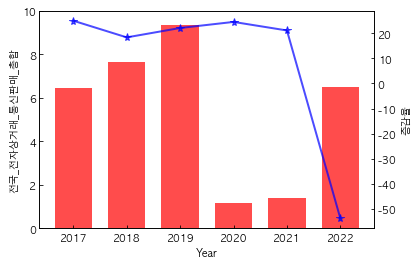

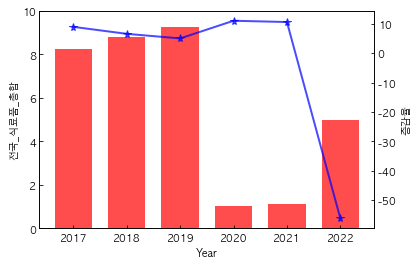

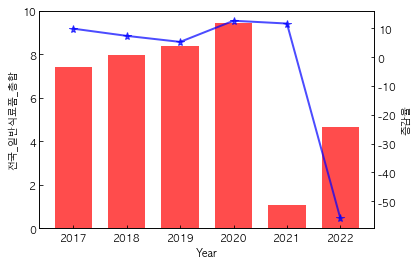

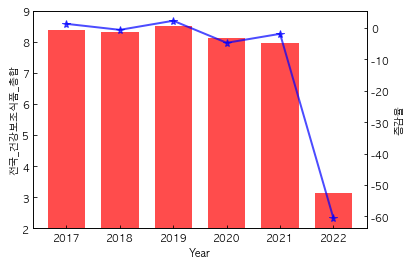

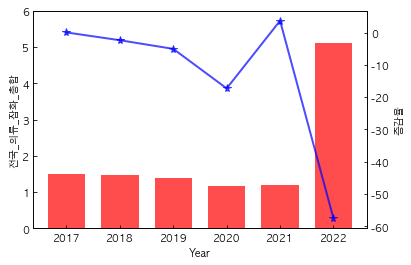

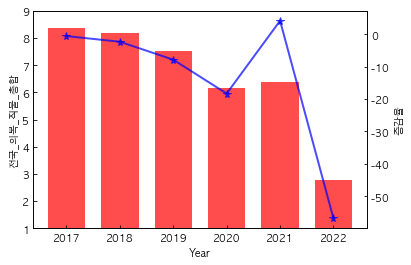

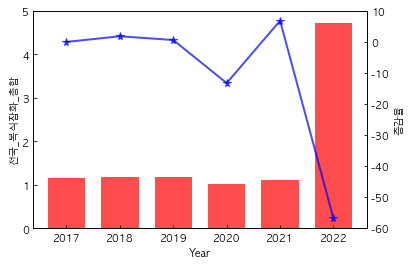

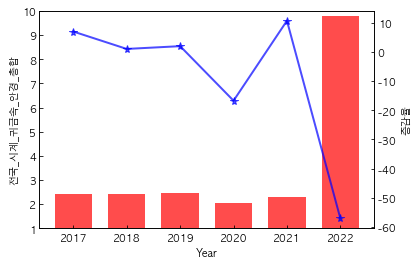

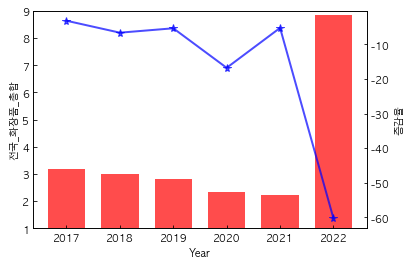

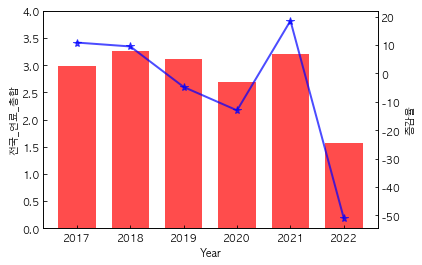

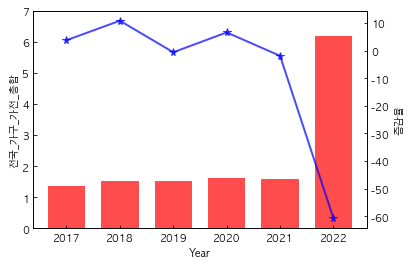

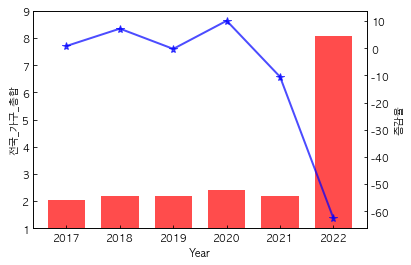

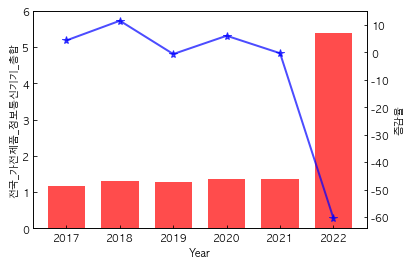

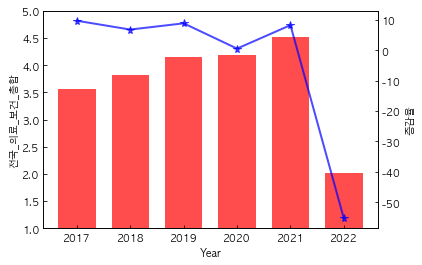

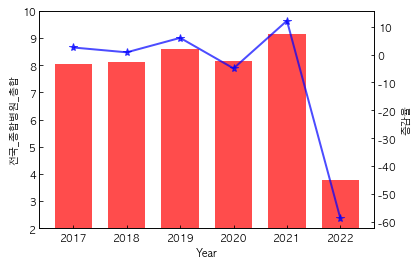

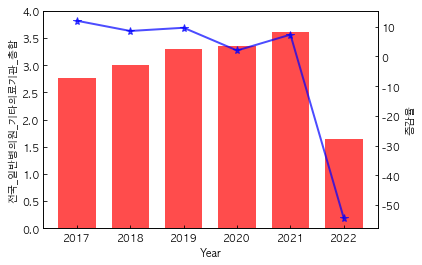

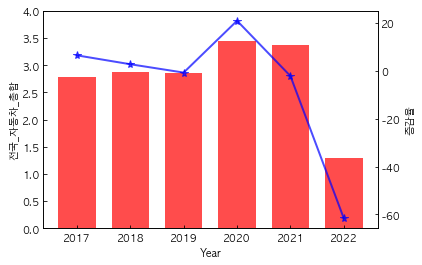

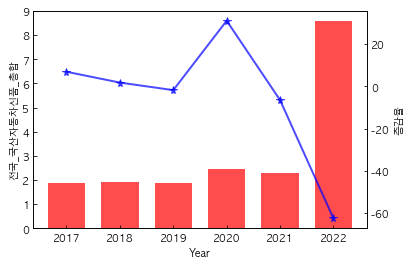

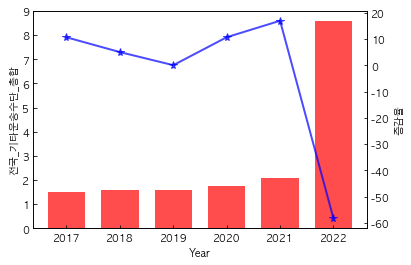

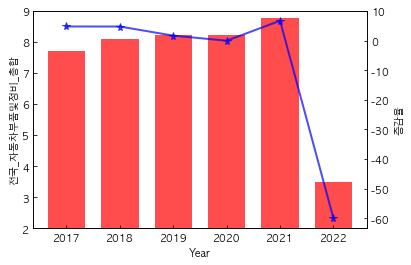

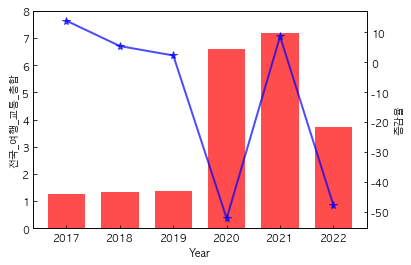

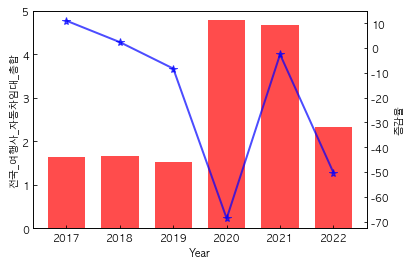

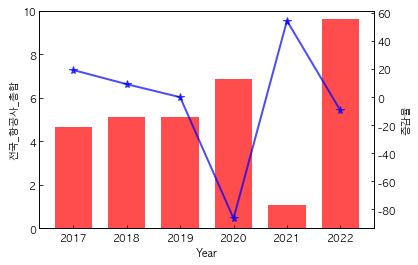

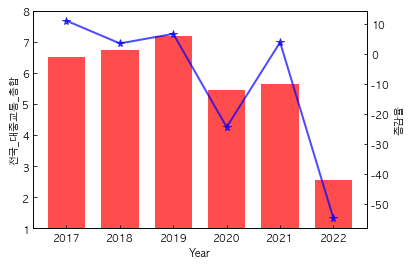

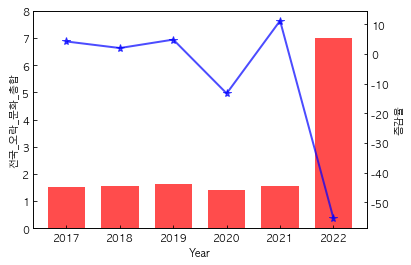

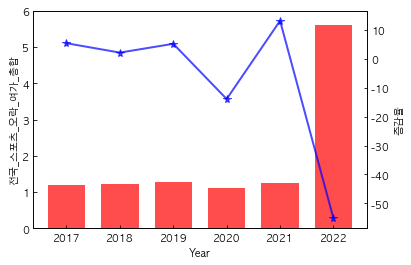

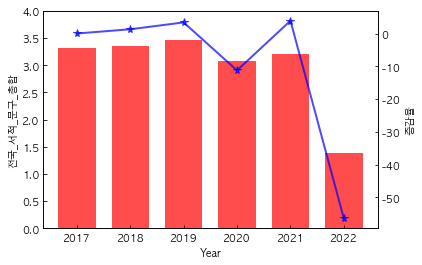

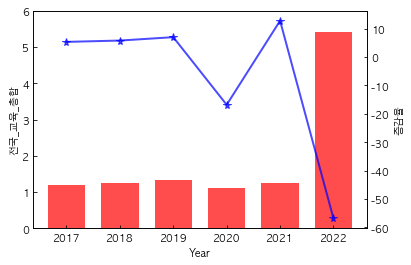

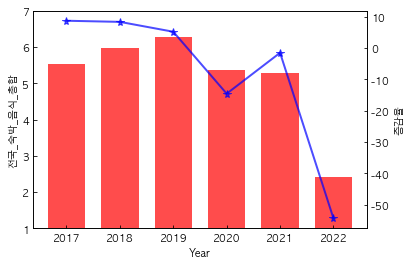

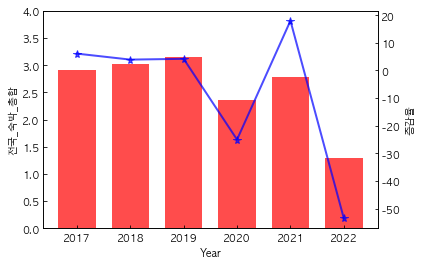

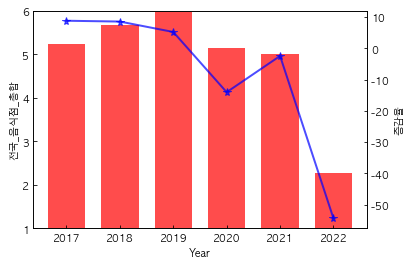

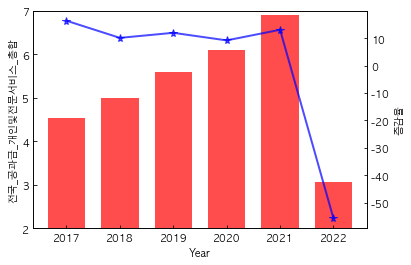

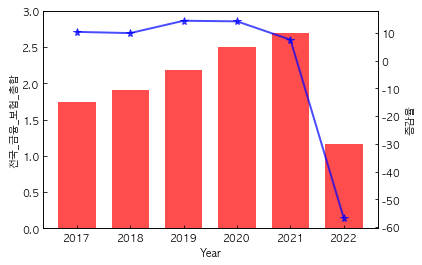

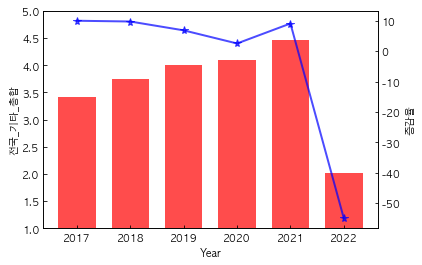

In [53]:
create_plot(year_total_sum)